# **Mobile Price Prediction**


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppressing all warnings
warnings.filterwarnings("ignore")

**Dataset Overview**

In [ ]:
# Load the dataset
df = pd.read_csv('train.csv')
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (2000, 21)


In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**Missing Data Check - No missing values**

In [ ]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


**Duplicate Records - No duplicates found**

In [ ]:
df.duplicated().sum()

0

**Checking Unique Values of each of the Features**

In [ ]:
df.nunique()

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8




---


Features like blue, dual_sim, and wifi have binary values. n_cores and price_range have multiple distinct values.


---




**CountPlots and Frequency Plots**

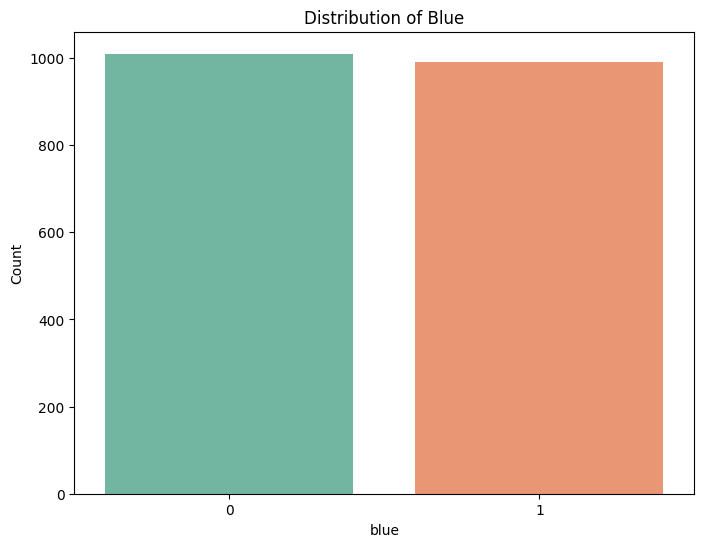

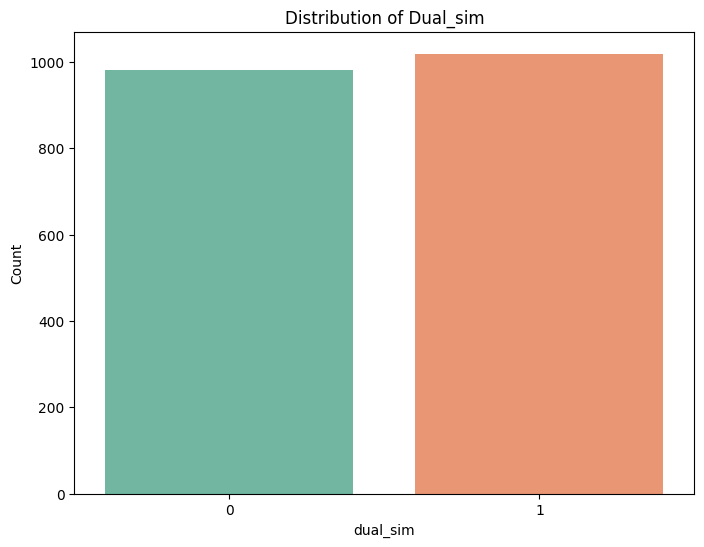

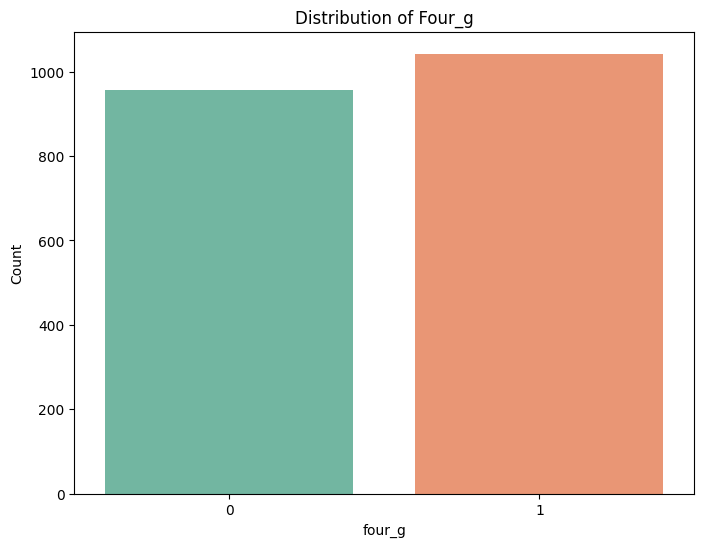

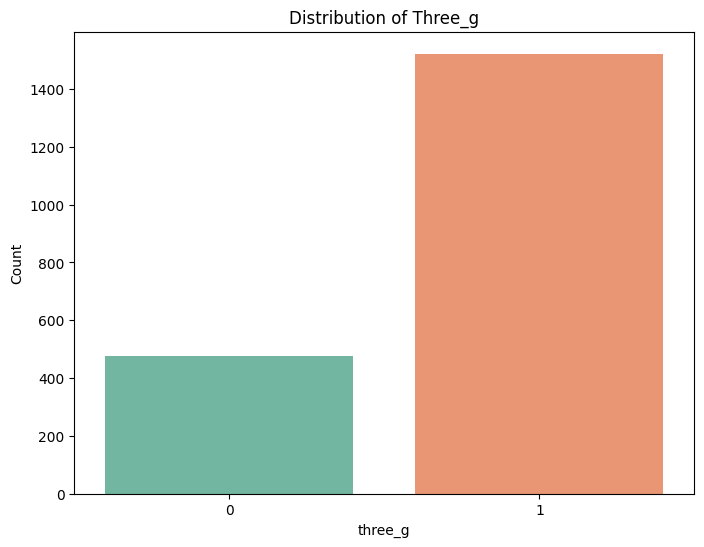

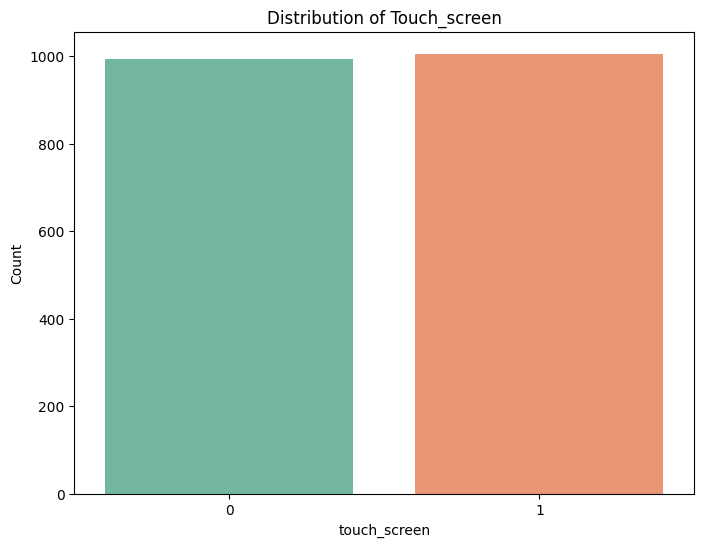

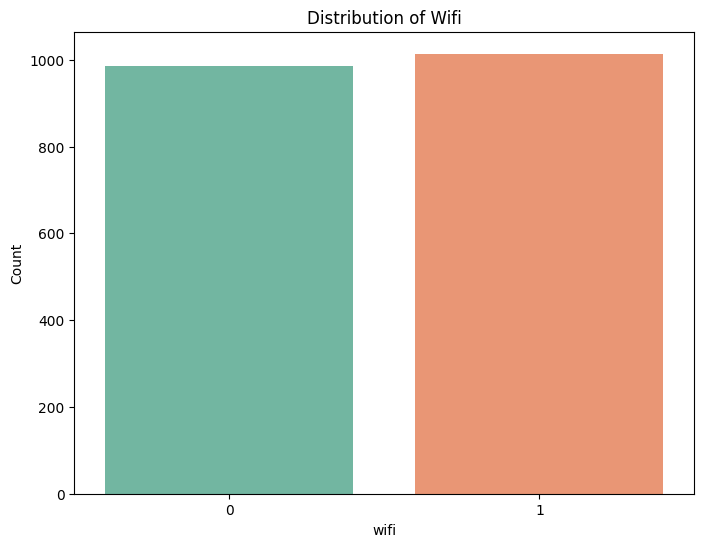

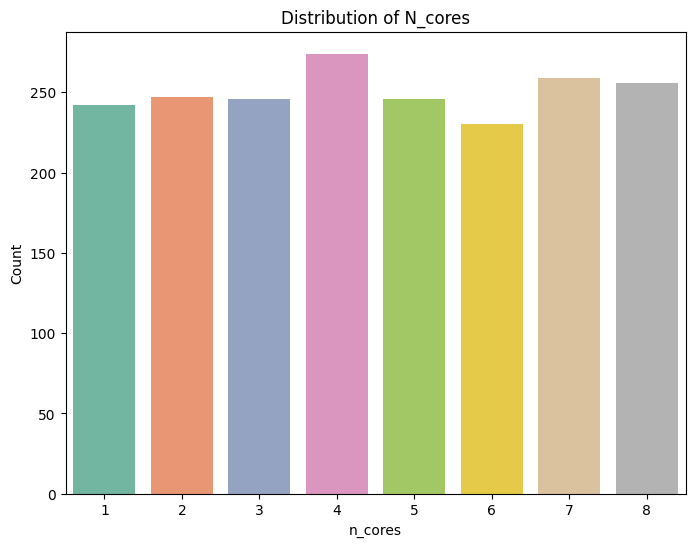

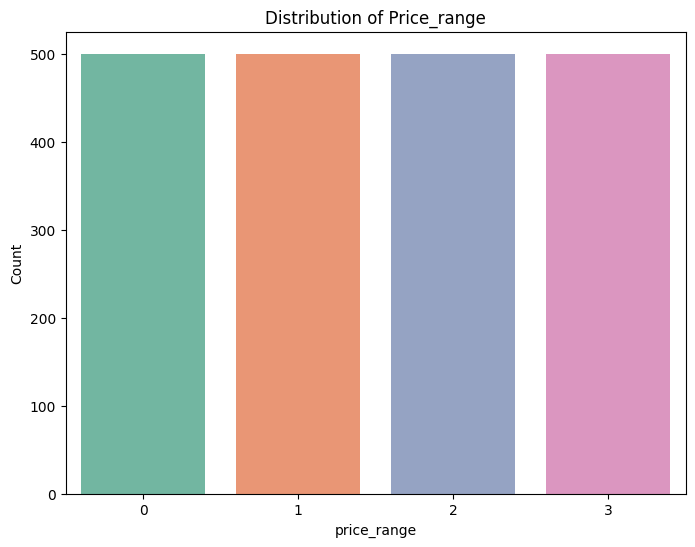

In [ ]:
# Let's create count plots for these features to visualize their distribution
for feature in ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores', 'price_range']:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

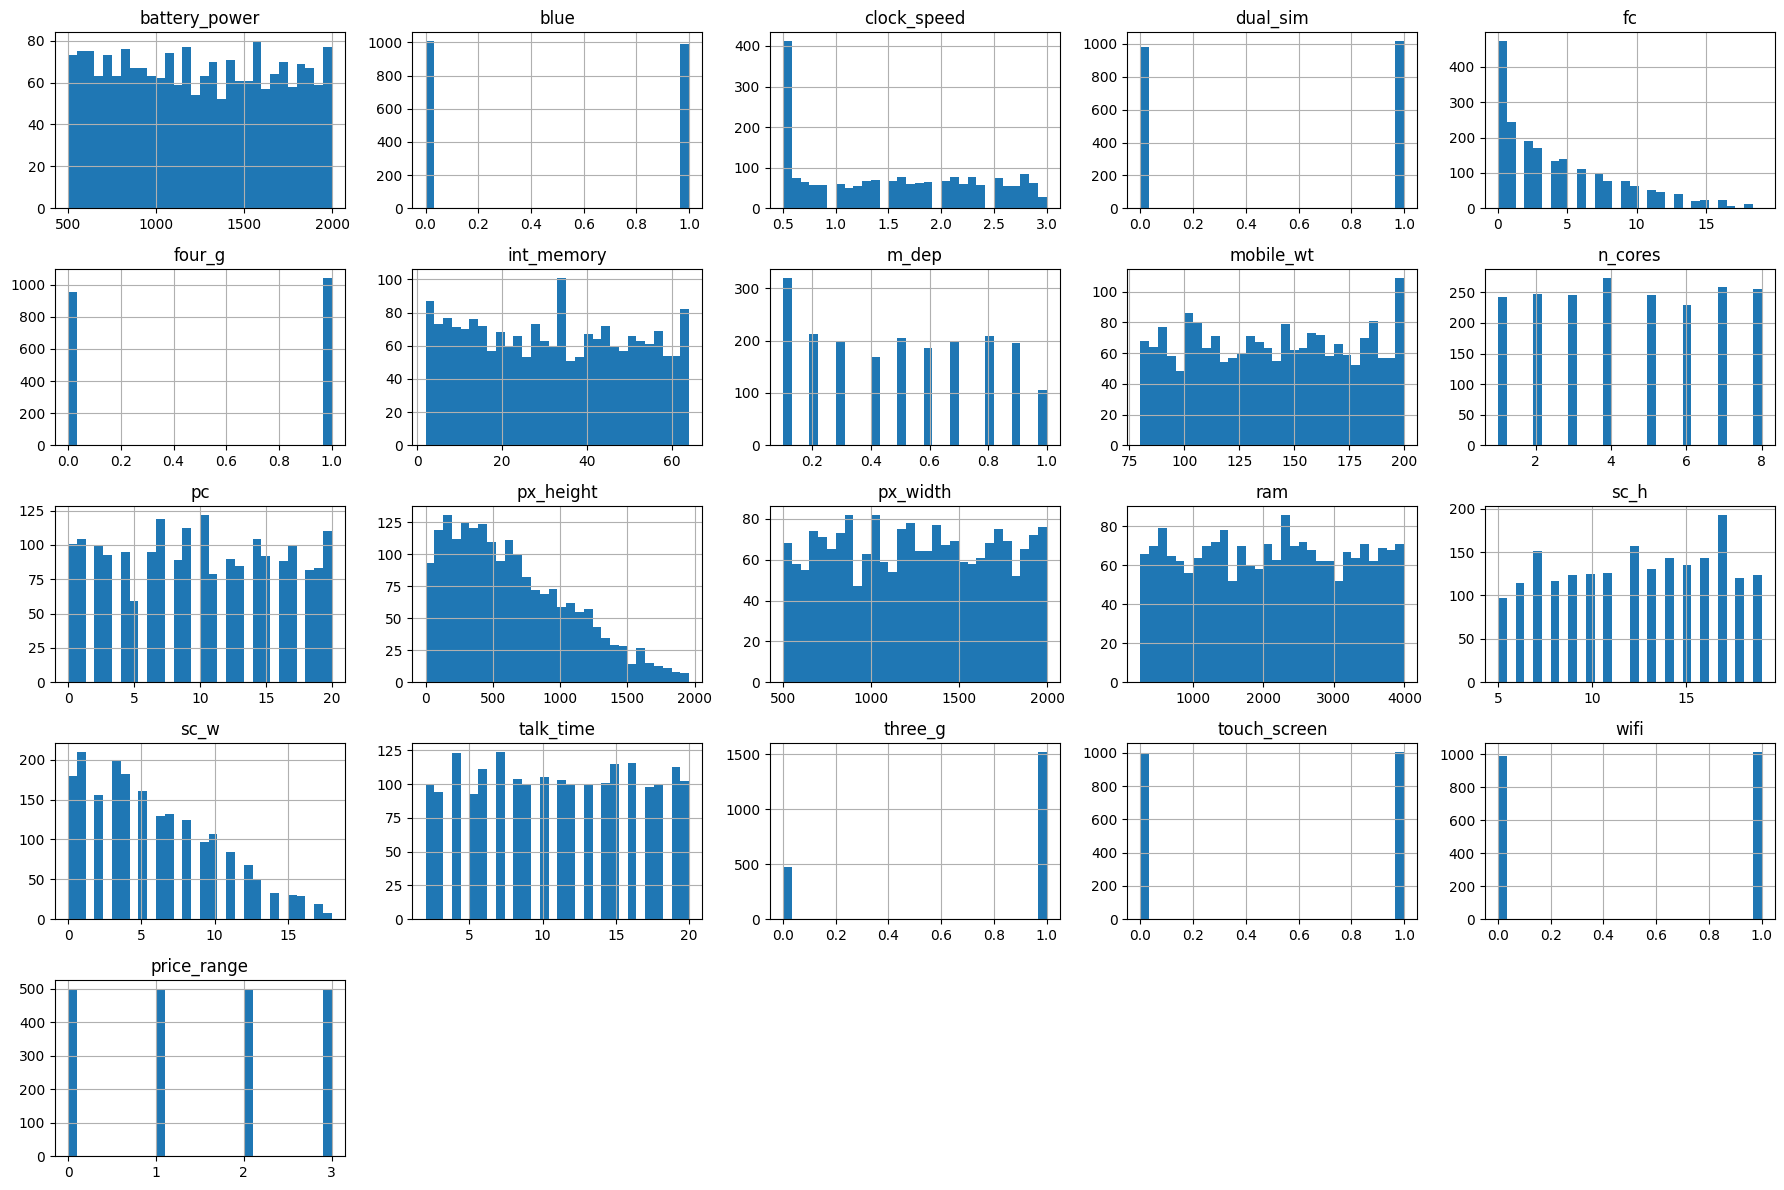

In [ ]:
# Plotting histograms for numerical features
df.hist(bins=30, figsize=(18, 12))
plt.tight_layout()
plt.show()

Histogram Analysis: Features like px_height and front_camera (fc) show a positive skew, suggesting more lower values in these columns.

**Outlier Detection**

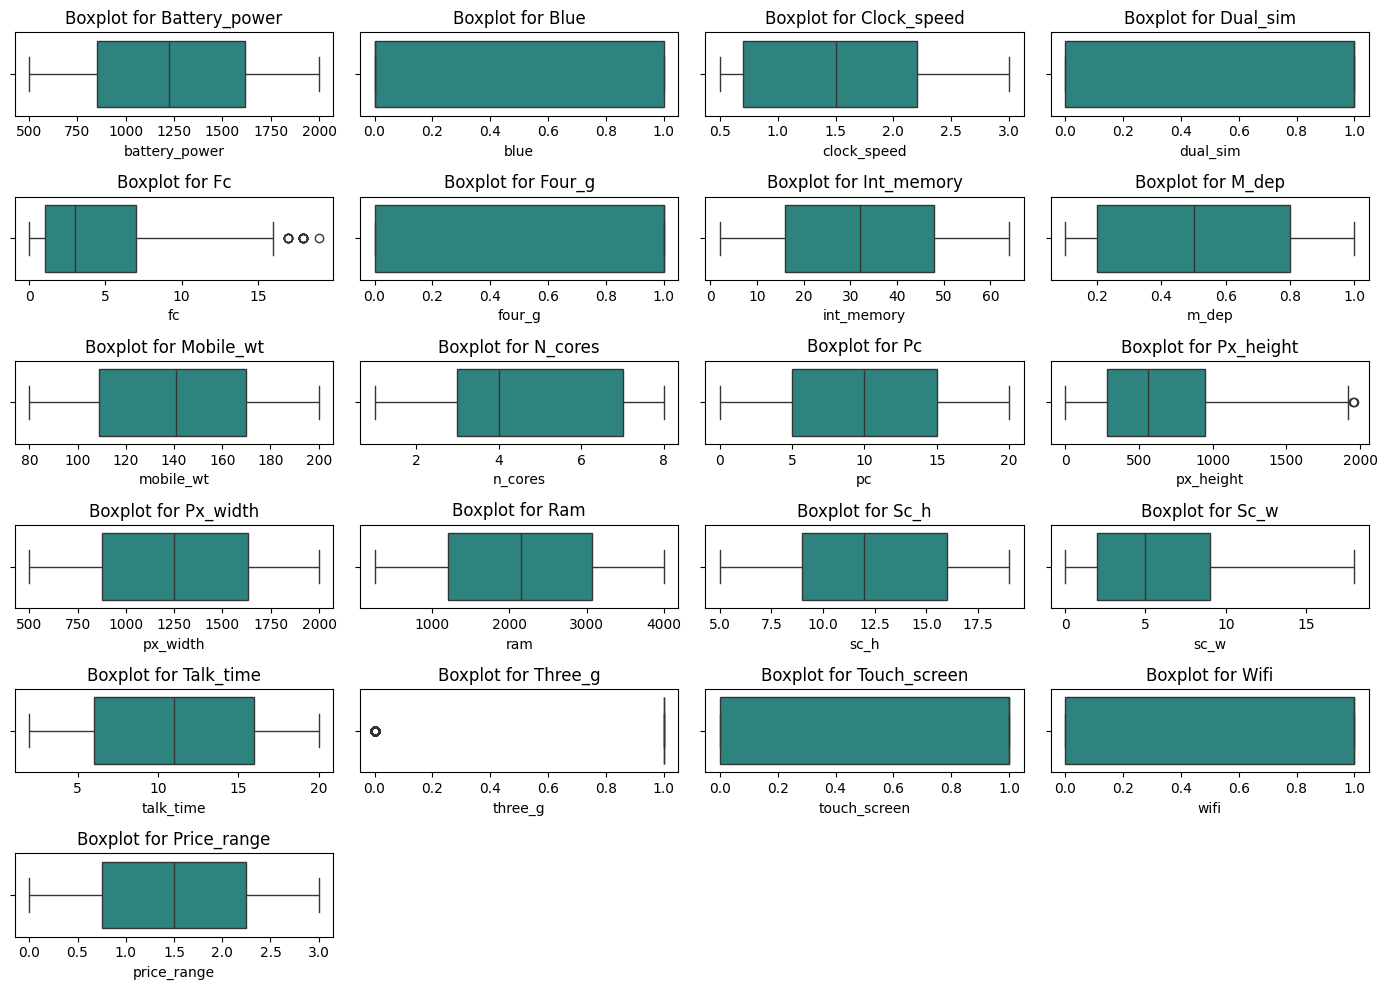

In [ ]:
# Visualize outliers using box plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot((len(df.columns) + 3) // 4, 4, i)
    sns.boxplot(x=df[column], palette= "viridis")
    plt.title(f'Boxplot for {column.capitalize()}')
plt.tight_layout()
plt.show()

**Handling the outliers using IQR**

In [ ]:
# Define the IQR for px_height and clip outliers
Q1 = df['px_height'].quantile(0.25)
Q3 = df['px_height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['px_height'] = np.clip(df['px_height'], lower_bound, upper_bound)

# Resetting index after handling outliers
df.reset_index(drop=True)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


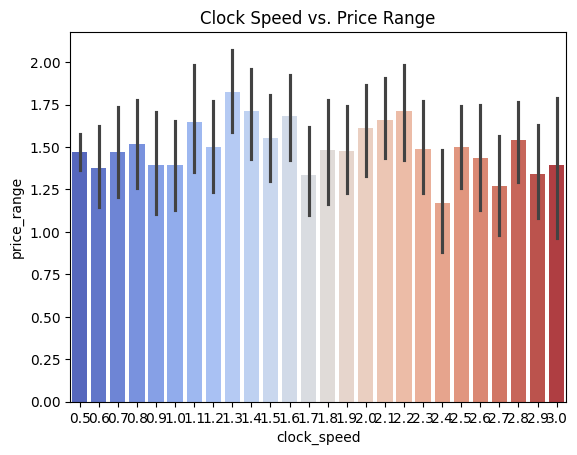

In [ ]:
# Plotting feature relationship with price_range
sns.barplot(data=df, x='clock_speed', y='price_range', palette='coolwarm')
plt.title('Clock Speed vs. Price Range')
plt.show()

The bar plot shows a mild positive relationship between clock speed and price_range, but there's a substantial overlap in the data across different price ranges.

**Feauture Scaling**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Columns to scale: excluding binary and target variables
cols_to_scale = df.drop(columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']).columns

# Scaling the features using StandardScaler
preprocessor = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), cols_to_scale)], remainder='passthrough'
)

df_scaled = preprocessor.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=preprocessor.get_feature_names_out())
df_scaled.columns = df_scaled.columns.str.replace('scaler__', '').str.replace('remainder__', '')

df_scaled

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.409023,-1.146784,...,-0.784983,0.283103,1.462493,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585842,1.704465,...,1.114266,-0.635317,-0.734267,1.0,1.0,1.0,1.0,1.0,0.0,2.0
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392805,1.074968,...,-0.310171,-0.864922,-0.368140,1.0,1.0,1.0,1.0,1.0,0.0,2.0
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286863,1.236971,...,0.876859,0.512708,-0.002014,1.0,0.0,0.0,1.0,0.0,0.0,2.0
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268830,-0.091452,...,-1.022389,-0.864922,0.730240,1.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,-1.253064,-0.992890,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300387,1.477661,...,0.164641,-0.405712,1.462493,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1996,1.653694,1.321096,-0.992890,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608383,1.651235,...,-0.310171,0.971917,0.913303,1.0,1.0,0.0,1.0,1.0,1.0,2.0
1997,1.530773,-0.762748,-0.762495,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502441,0.880565,...,-0.784983,-1.094526,-1.100394,0.0,1.0,1.0,1.0,1.0,0.0,3.0
1998,0.622527,-0.762748,-0.071307,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696732,-1.345816,...,1.351672,0.971917,1.462493,0.0,0.0,1.0,1.0,1.0,1.0,0.0


Scalarization is applied on the column using Standard Scalar defined in the column transformer

**Feature Engineering**

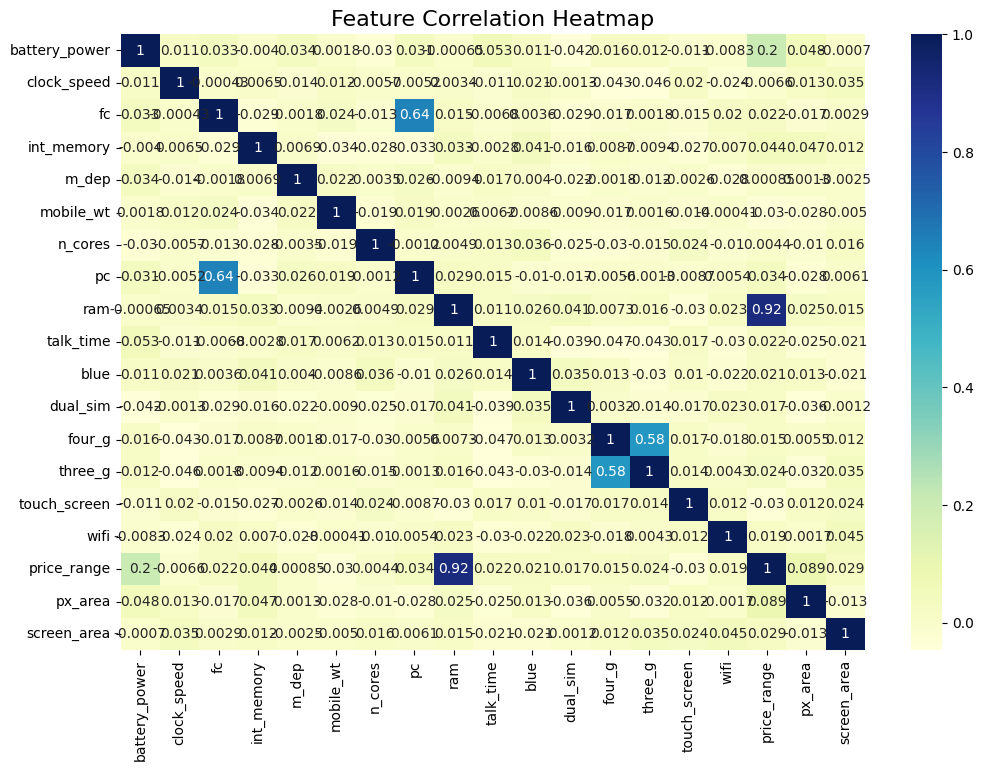

In [ ]:
# Create new features: Area from px_height * px_width and screen area from sc_h * sc_w
df_scaled['px_area'] = df_scaled['px_height'] * df_scaled['px_width']
df_scaled['screen_area'] = df_scaled['sc_h'] * df_scaled['sc_w']

# Dropping original columns used for new feature creation
df_scaled.drop(columns=['px_height', 'px_width', 'sc_h', 'sc_w'], axis=1, inplace=True)

# Correlation matrix visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='YlGnBu')
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


The heatmap indicates that features like ram and battery_power are positively correlated with the price_range, which aligns with our expectations.

**Models**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df_scaled.drop('price_range', axis=1)
y = df_scaled['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Hyperparameter tuning and model training
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Define models and hyperparameters
models_and_params = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [None, 5, 10, 15, 20],
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 15],
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1, 10],
            'max_iter': [100, 200, 300, 500],
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.3],
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.5, 1],
        }
    }
}


In [ ]:
# Store the results
model_results = []

In [ ]:
# Iterate through models
for model_name, model_info in models_and_params.items():
    model = model_info['model']
    params = model_info['params']

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Make predictions
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    model_results.append({
        'model': model_name,
        'best_params': grid_search.best_params_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    })


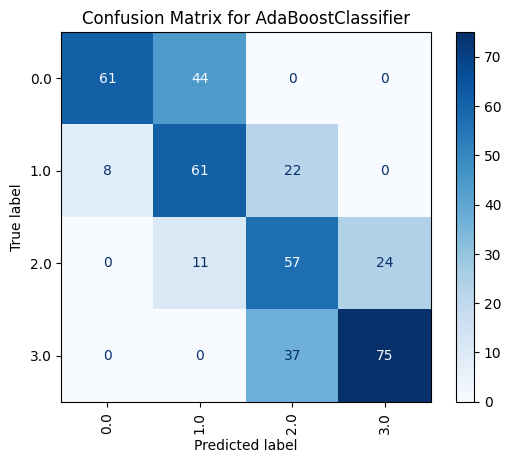

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title(f'Confusion Matrix for {model_name}')
plt.show()


In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame(model_results)

In [ ]:
# Round values
results_df = results_df.round({'accuracy': 2, 'precision': 2, 'recall': 2, 'f1': 2})

                    model                                        best_params  \
0  RandomForestClassifier           {'max_depth': None, 'n_estimators': 150}   
1  DecisionTreeClassifier  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
2      LogisticRegression        {'C': 10, 'max_iter': 100, 'penalty': 'l1'}   
3           XGBClassifier  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
4      AdaBoostClassifier          {'learning_rate': 1, 'n_estimators': 200}   

   accuracy  precision  recall    f1  
0      0.82       0.83    0.82  0.83  
1      0.80       0.82    0.80  0.81  
2      0.78       0.78    0.78  0.78  
3      0.83       0.83    0.83  0.83  
4      0.64       0.68    0.64  0.64  


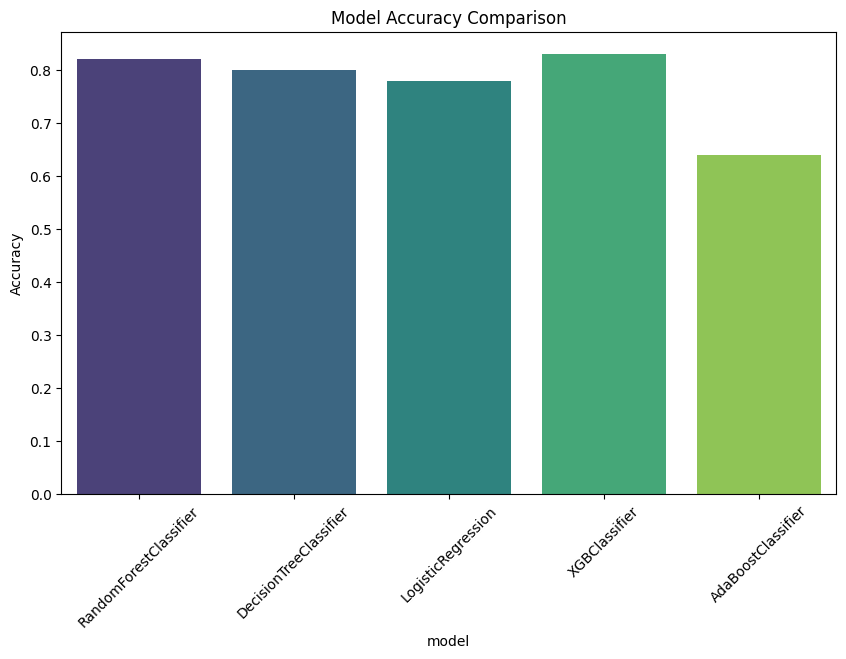

In [ ]:
# Display results
print(results_df)

#Bar chart comparison of model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

# Conclusion

In this model comparison, we evaluated multiple machine learning algorithms on the task of predicting the price range of mobile phones, based on various features like RAM, battery power, screen size, and camera resolution. After conducting hyperparameter tuning with **GridSearchCV** for each model, the following conclusions can be drawn:

1. **XGBClassifier** outperformed all other models with the highest accuracy (0.83), precision (0.83), recall (0.83), and F1-score (0.83). This suggests that **XGBoost** is particularly effective for this classification task, potentially due to its ability to handle non-linear relationships and feature interactions.

2. **RandomForestClassifier** also showed strong performance with an accuracy of 0.82, precision of 0.83, recall of 0.82, and F1-score of 0.83. Although it performed slightly below **XGBClassifier**, it still remains a highly reliable choice for this task due to its robustness and ease of use.

3. **DecisionTreeClassifier** performed moderately with an accuracy of 0.80 and a reasonably balanced precision and recall (0.82 and 0.80, respectively). While decision trees are interpretable, they tend to overfit, which may have impacted their performance on this dataset.

4. **LogisticRegression** showed good performance with an accuracy of 0.78 and precision, recall, and F1-scores all at 0.78. While it is a simpler model, its performance was slightly lower compared to the ensemble methods.

5. **AdaBoostClassifier** had the lowest performance across all metrics, with an accuracy of 0.64, precision of 0.68, recall of 0.64, and F1-score of 0.64. This indicates that the AdaBoost model might not be the best fit for this problem, likely due to the complexity of the feature relationships that AdaBoost struggles to capture in this case.

### Summary:
- **XGBClassifier** is the top-performing model for this dataset, followed closely by **RandomForestClassifier**.
- **DecisionTreeClassifier** and **LogisticRegression** also offer reasonable performance but are not as effective as the ensemble models.
- **AdaBoostClassifier** underperformed compared to other models.

In future iterations, further tuning or feature engineering might enhance the performance of **LogisticRegression** and **DecisionTreeClassifier**, while **XGBClassifier** and **RandomForestClassifier** are already strong contenders for deployment.







